## 서울 지하철역 

심용우

In [1]:
import numpy as np
import scipy.linalg as la
import scipy.sparse as sp
import scipy.sparse.linalg

import matplotlib.pyplot as plt
import matplotlib as mpl

import networkx as nx
import json

from networkx.drawing.nx_agraph import graphviz_layout

In [2]:
g = nx.Graph()

In [3]:
# 1호선

line_1 = []
for i in range(100, 160):
    line_1.append((i, i +1, 1))
    
for i in range(1111, 1121):
    line_1.append((i, i +1, 1))

for i in range(1142, 1157):
    line_1.append((i, i +1, 1))    
    
line_1.append((1111, 135, 1))
line_1.append((1117, 124, 1))
line_1.append((1118, 123, 1))
line_1.append((1142, 141, 1))
    
    
# 2호선

line_2 = []
for i in range(201, 243):
    line_2.append((i, i +1, 1))
line_2.append((243,  201, 1))

line_2.append((234,  2341, 1))
line_2.append((2341, 2342, 1))
line_2.append((2342, 2343, 1))
line_2.append((2343, 2344, 1))
line_2.append((211,  2111, 1))
line_2.append((2111, 2112, 1))
line_2.append((2112, 2113, 1))
line_2.append((2113, 2114, 1))

# 3호선

line_3 = []
for i in range(310, 352):
    line_3.append((i, i +1, 1))

# 4호선

line_4 = []
for i in range(409, 450):
    line_4.append((i, i +1, 1))

#5호선

line_5 = []
for i in range(510, 553):
    line_5.append((i, i +1, 1))
    
for i in range(554, 560):
    line_5.append((i, i +1, 1))

line_5.append((548, 554, 1))

    
# 6호선

line_6 = []
for i in range(616, 646):
    line_6.append((i,i +1, 1))
    
for i in range(610,615):
    line_6.append((i,i +1, 1))

line_6.append((610, 615, 1))
line_6.append((610, 616, 1))

# 7호선

line_7 = []
for i in range(709, 750):
    line_7.append((i, i +1, 1))

# 8 호선

line_8 = []
for i in range(810, 826):
    line_8.append((i, i +1, 1))
    
# 환승 - transfer
z = [(132, 201, {}), (140, 234, {}), (203, 330, {}), (223, 340, {}), (130, 329, {}),
     (116, 412, {}), (128, 421, {}), (422, 205, {}), (423, 331, {}), (426, 133, {}),
     (226, 433, {}), (523, 236, {}), (525, 138, {}), (243, 531, {}), (534, 130, {}),
     (329, 534, {}), (535, 204, {}), (536, 205, {}), (536, 422, {}), (540, 208, {}),
     (612, 322, {}), (614, 321, {}), (622, 238, {}), (626, 529, {}), (628, 428, {}),
     (633, 333, {}), (634, 537, {}), (206, 635, {}), (636, 127, {}), (644, 120, {}),
     (710, 113, {}), (713, 411, {}), (717, 645, {}), (725, 544, {}), (727, 212, {}),
     (734, 339, {}), (736, 432, {}), (744, 233, {}), (750, 145, {}), (557, 352, {}),
     (811, 547, {}), (814, 216, {}), (817, 350, {}),
     (2344, 518, {}), (2114, 126, {}), (1111, 430, {}), (1114, 335, {}), (1116, 208, {}),
     (1116, 540, {}), (1119, 720, {}), (1142, 746, {}), (1149, 443, {})]


g.add_weighted_edges_from(line_1)
g.add_weighted_edges_from(line_2)
g.add_weighted_edges_from(line_3)
g.add_weighted_edges_from(line_4)
g.add_weighted_edges_from(line_5)
g.add_weighted_edges_from(line_6)
g.add_weighted_edges_from(line_7)
g.add_weighted_edges_from(line_8)
g.add_weighted_edges_from(z)

In [4]:
for n1, n2 in g.edges():
    
    if g[n1][n2]["weight"]=={}:
        g[n1][n2]["transfer"] = True
    else:
        g[n1][n2]["transfer"] = False

In [5]:
on_foot = [edge for edge in g.edges() if g.get_edge_data(*edge)["transfer"]]
on_train = [edge for edge in g.edges() if not g.get_edge_data(*edge)["transfer"]]

In [6]:
color_list=['blue', 'lime', 'orange', 'cyan', 'm', 'sienna', 'olive', 'magenta']
colors=[]
for i in g.nodes():
    if i < 1000:
        colors.append(color_list[(i//100) -1])
    else:
        colors.append(color_list[(i//1000) -1])

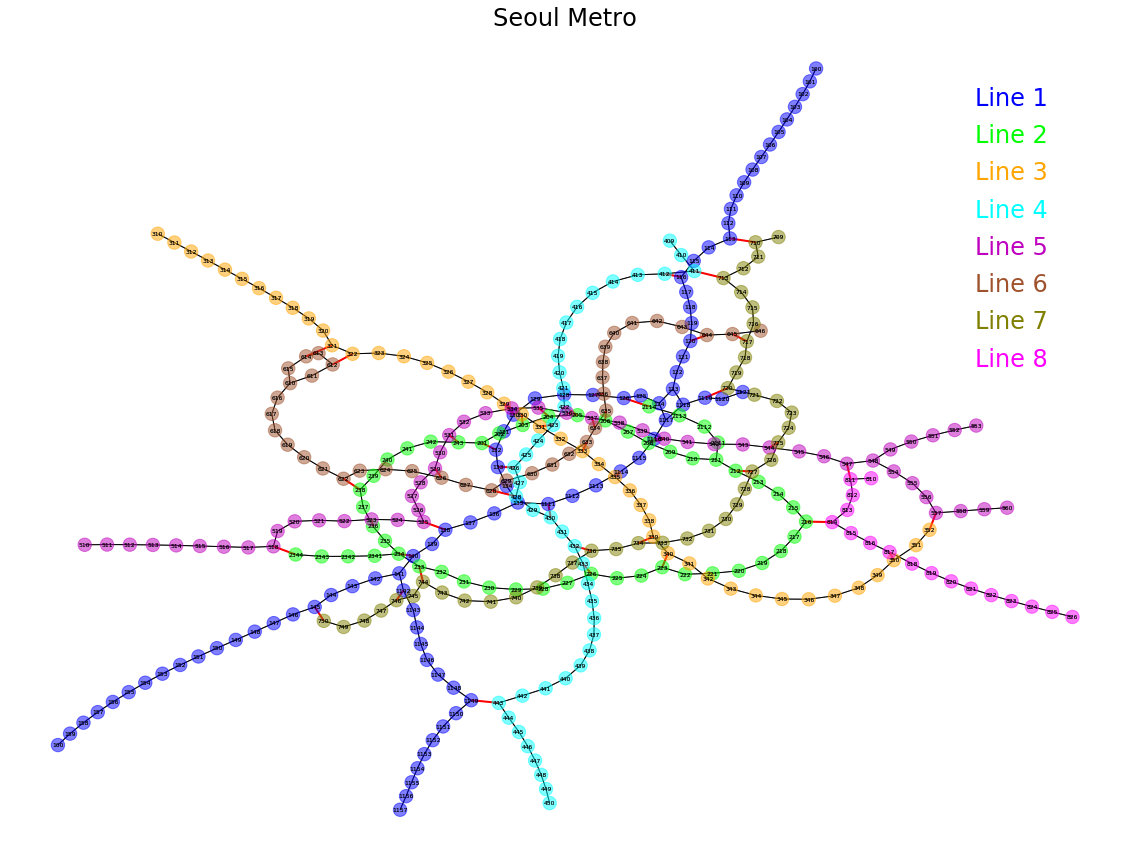

In [7]:
# 이미지 사이즈 1440 x 1080 
fig,ax = plt.subplots(figsize=(20, 15))

# 레이블
for i in range(len(color_list)):
    plt.text(1400, 2000 -200*i, 'Line {0}'.format(i +1), color=color_list[i], fontsize=24)

#그래프 - 지하철 노선도
pos = graphviz_layout(g, prog="neato")

nx.draw_networkx(g, pos, ax=ax, node_size=180, node_color=colors, alpha=0.5, font_size=6)
nx.draw_networkx_labels(g, pos=pos, ax=ax, font_size=6)
nx.draw_networkx_edges(g, pos=pos, ax=ax, edgelist=on_train, width=1)
nx.draw_networkx_edges(g, pos=pos, ax=ax, edgelist=on_foot, edge_color="red", width=2)

plt.title("Seoul Metro", fontsize=24)

for side in ['bottom','right','top','left']:
    ax.spines[side].set_visible(False)

ax.set_xticks([])
ax.set_yticks([])
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

plt.savefig('SeoulMetro_1.pdf')

In [8]:
# 그래프 -> 딕셔너리 -> Json파일

g_dict = nx.to_dict_of_lists(g)

json = json.dumps(g_dict)

with open('SeoulMetro_1.json','w') as fb:
    fb.write(json)